In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme('poster')
os.chdir('F:/Python/proyectos/Risk_Analysis')

In [18]:
df = pd.read_csv('F:/datasets/loan_data_2007_2014.csv', index_col=0)

C:\Users\joaco\AppData\Local\Temp\ipykernel_9560\975559487.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('F:/datasets/loan_data_2007_2014.csv', index_col=0)


In [19]:
df['dti'].fillna(df['dti'].mean())
df['open_acc'].fillna(df['open_acc'].mean())
df['last_pymnt_amnt'].fillna(df['last_pymnt_amnt'].mean())
df['tot_coll_amt'].fillna(df['tot_coll_amt'].mean())

0         191.913517
1         191.913517
2         191.913517
3         191.913517
4         191.913517
             ...    
466280      0.000000
466281      0.000000
466282      0.000000
466283      0.000000
466284      0.000000
Name: tot_coll_amt, Length: 466285, dtype: float64

In [20]:
df.dropna(axis=1, inplace=True)
df.drop(columns=['url'], inplace=True)

In [21]:
df['term'] = df['term'].str.replace("months", "")
df['term'] = pd.to_numeric(df['term'])

In [22]:
encoding = pd.get_dummies(df['grade'], dtype=int)
df = df.join(encoding)
df.drop(columns=['grade'], inplace=True)

In [23]:
encoding_sub = pd.get_dummies(df['sub_grade'], dtype=int)
df = df.join(encoding_sub)
df.drop(columns=['sub_grade'], inplace=True)

In [24]:
from datetime import datetime
import numpy as np

df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%d')
end_date = datetime.strptime('2017-12-01', '%Y-%M-%d')
end_date
df['issue_date_months'] = round(pd.to_numeric((end_date - df['issue_d']) / np.timedelta64(1, 'M')) )
df.drop(columns=['issue_d'], inplace=True)

In [25]:
df['target'] = np.where(df['loan_status'].isin(['Charged Off',
                                                'Default',
                                                'Does not meet the credit policy. Status:Charged Off',
                                                'Late (31-120 days)']), 0, 1)

In [168]:
woe_example_total = df.groupby(['addr_state'], as_index=False)['target'].count()
woe_example_good = df.groupby(['addr_state'], as_index=False)['target'].sum()
df_example = pd.concat([woe_example_good, woe_example_total['target']], axis=1)
df_example.columns = ['state', 'good', 'total']
df_example['bad'] = df_example['total'] - df_example['good']
df_example['percentage_good'] = df_example['good'] / df_example['total']
df_example['percentage_bad'] = 1 - df_example['percentage_good']
df_example['prop_good'] = df_example['good'] / df_example['good'].sum()
df_example['prop_bad'] = df_example['bad'] / df_example['bad'].sum()
df_example['woe'] = np.log(df_example['prop_good'] / df_example['prop_bad'])
df_example.sort_values(by='woe')

,state,good,total,bad,percentage_good,percentage_bad,prop_good,prop_bad,woe
28,NE,6,14,8,0.428571,0.571429,0.000014,0.000157,-2.385526
12,IA,11,14,3,0.785714,0.214286,0.000026,0.000059,-0.798561
32,NV,5625,6519,894,0.862862,0.137138,0.013544,0.017540,-0.258574
11,HI,2173,2487,314,0.873743,0.126257,0.005232,0.006161,-0.163373
9,FL,27671,31637,3966,0.874640,0.125360,0.066626,0.077814,-0.155217
1,AL,5130,5853,723,0.876474,0.123526,0.012352,0.014185,-0.138392
33,NY,35541,40242,4701,0.883182,0.116818,0.085576,0.092234,-0.074932
18,LA,4849,5489,640,0.883403,0.116597,0.011675,0.012557,-0.072784
31,NM,2289,2588,299,0.884467,0.115533,0.005511,0.005866,-0.062417
35,OK,3642,4117,475,0.884625,0.115375,0.008769,0.009320,-0.060871


<Axes: xlabel='state', ylabel='woe'>

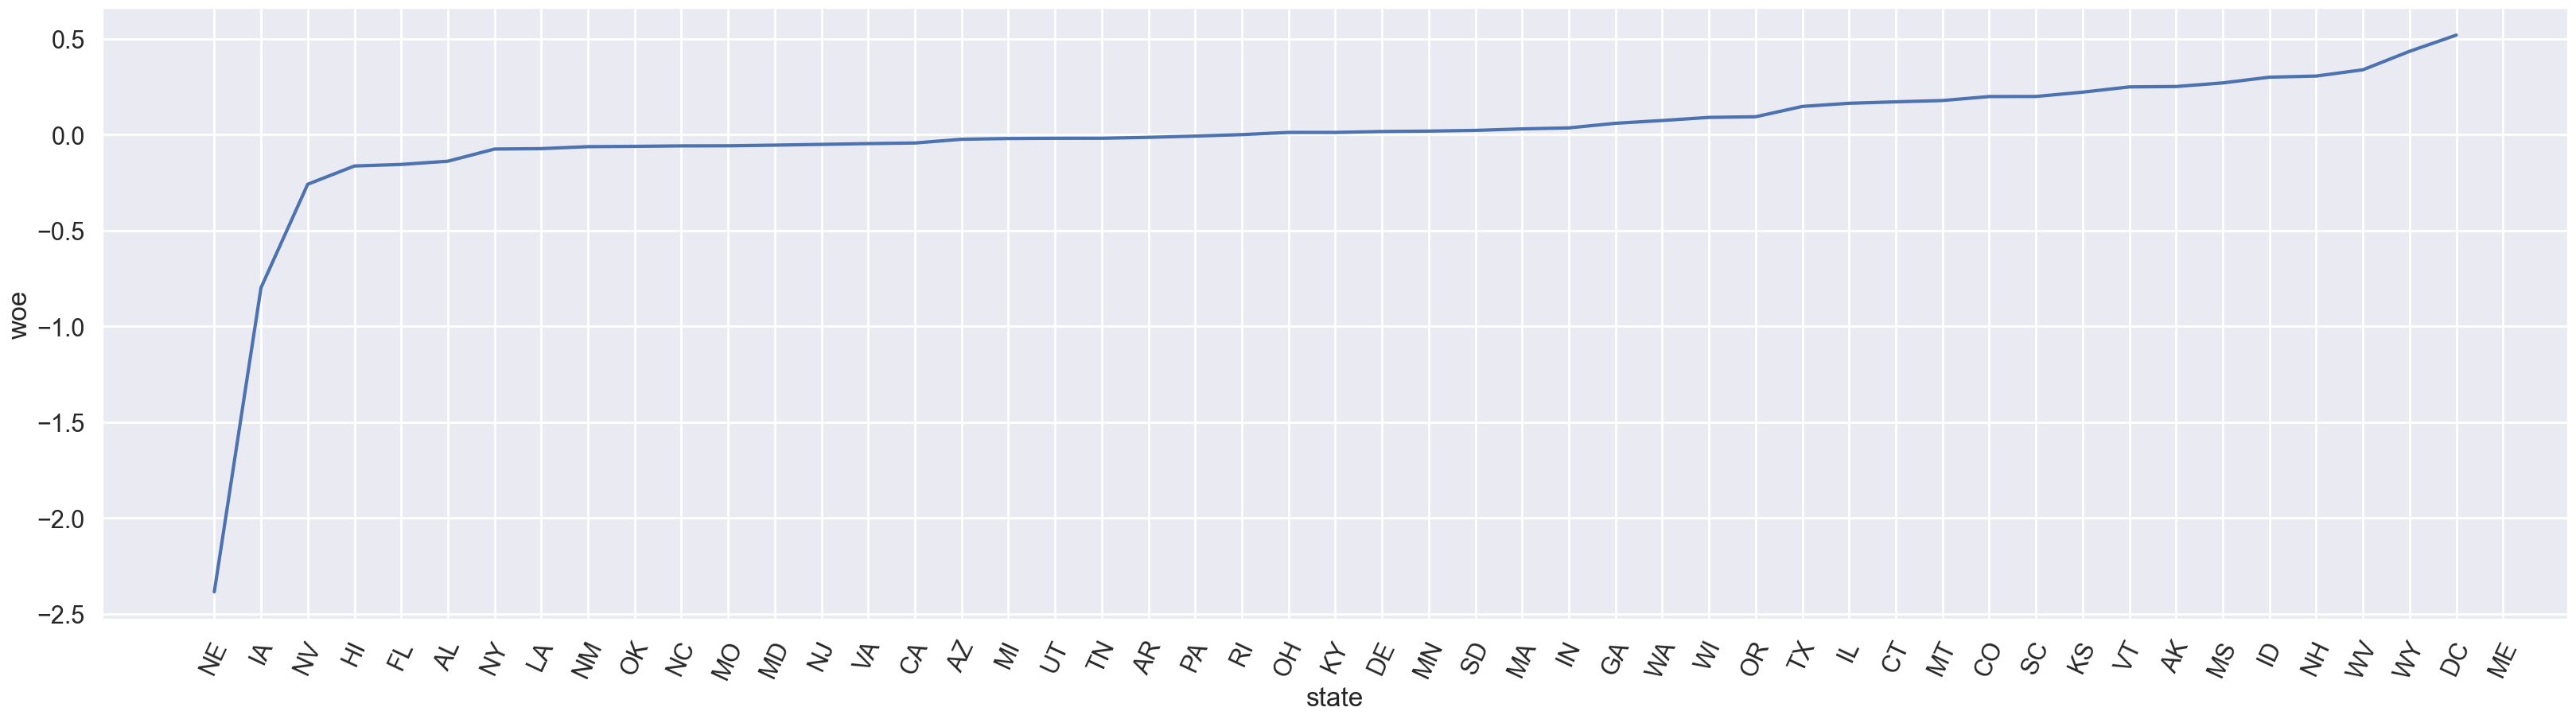

In [182]:
plt.figure(figsize=(40, 10))
plt.xticks(rotation=65)
sns.lineplot(df_example.sort_values(by='woe'), x='state', y='woe')

In [28]:
from sklearn.model_selection import train_test_split

train_features, test_features, targets_train, targets_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.3, shuffle=True)
